# PeakAffectDS Analysis

### Load Libraries

Here we will load the relevant libraries needed to properly analyze the data. We will be using Pandas to load the data into dataframes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [2]:
happy = pd.read_csv('Data/Raw_PID_01-10/01/01-03-01.csv')
print('rows =', len(happy.index))
happy.head()

rows = 390568


,Time,EMG_zyg,EMG_cor,ECG,Respiration,Events
0,0.0005,-0.048828,-0.057068,-0.170288,-0.065918,0.0
1,0.0010,-0.031433,-0.043030,-0.169067,-0.065308,0.0
2,0.0015,-0.002136,-0.024414,-0.169983,-0.065002,0.0
3,0.0020,0.030212,-0.003357,-0.172424,-0.064392,0.0
4,0.0025,0.040894,0.010681,-0.174866,-0.063782,0.0


### Exploring The Data

Now we can use this data to make a power spectrum graph. Here, I will make a graph of the `EMG_zyg` column using the `np.fft.fft()` function. Note that the resulting graph will be mirrored at `Frequency=0`, so we will remove all frequencies less than 0.

In [48]:
#
# Creates a dataframe of power spectrum information given a series of
# voltage values and the time step between each value
#

def makePowerSpectrum(data, time_step):
    mags = np.abs(np.fft.fft(data)) ** 2
    freqs = np.fft.fftfreq(data.size, time_step)
    idx = np.argsort(freqs)
    ps = pd.DataFrame({'Frequency': freqs[idx], 'Magnitude': mags[idx]})
    
    # Remove mirrored frequencies
    ps = ps[ps['Frequency'] >= 0]
    
    return ps

In [49]:
#
# Looks at the shape of the data
#

ps = makePowerSpectrum(happy['EMG_zyg'], 0.0005)
print('rows =', len(ps))
ps.head()

rows = 195284


,Frequency,Magnitude
195284,0.000000,78327.384986
195285,0.005121,166.548020
195286,0.010241,965.221469
195287,0.015362,495.377823
195288,0.020483,435.852112


Text(0, 0.5, 'Magnitude')

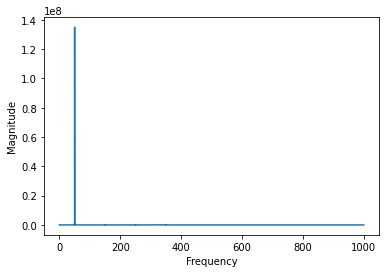

In [50]:
#
# Plots the power spectrum for EMG_zyg
#

plt.plot(ps['Frequency'], ps['Magnitude'])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

From this graph, we can see that there are massive spikes in the power at the 50 Hz range, as we might have expected. We also see from the shape of the data we have many entries, with each entry differing by a fraction of 1 Hz.

Here, I will plot the frequencies that are higher than 50 to avoid the noise introduced at the 50 Hz range to be able to get a better picture of what is happening on the scale too small to see.

Text(0, 0.5, 'Magnitude')

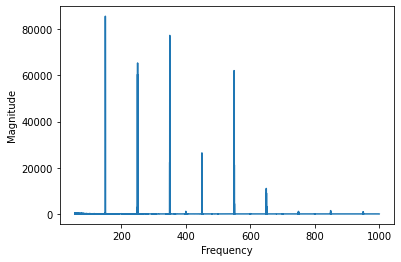

In [51]:
#
# Ensuring the data still looks good despite noise
#

upper_ps = ps[ps['Frequency'] >= 55]

plt.plot(upper_ps['Frequency'], upper_ps['Magnitude'])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

Now that we are not seeing the noise, we can see clearly that there are events happening that are triggering the EMG. Now we will check the other columns for noise:

Text(0, 0.5, 'Magnitude')

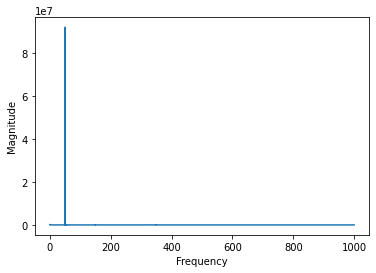

In [52]:
#
# Plots the power spectrum for EMG_cor
#

ps = makePowerSpectrum(happy['EMG_cor'], 0.0005)
plt.plot(ps['Frequency'], ps['Magnitude'])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

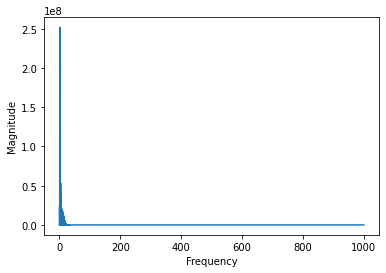

In [53]:
#
# Plots the power spectrum for ECG
#

ps = makePowerSpectrum(happy['ECG'], 0.0005)
plt.plot(ps['Frequency'], ps['Magnitude'])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

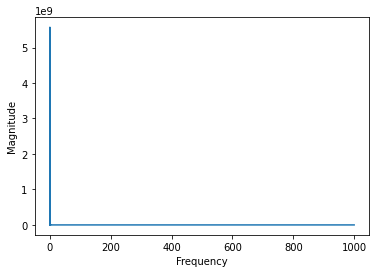

In [54]:
#
# Plots the power spectrum for Respirator
#

ps = makePowerSpectrum(happy['Respiration'], 0.0005)
plt.plot(ps['Frequency'], ps['Magnitude'])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

### Filtering The Data

Two things we can do to make a more useful representation of the power spectrum are:
- Remove the frequencies less than 0 since they are redundant
- Remove the noise at the 50 Hz mark